In [1]:
import os
import sys

In [2]:
sys.path.append('..')

In [3]:
from helpers import *

In [4]:
from sklearn.decomposition import PCA

#### Get some data

In [5]:
test_sym = 'MSFT'
test_df = stock_prices(test_sym)

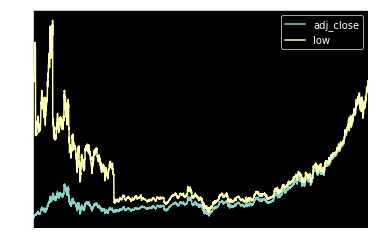

In [6]:
test_df = interpolate_df(test_df)
test_df[['adj_close','low']].plot()

In [7]:
test_df.head()

,adj_close,close,dividend,high,low,open,split,symbol,volume
1998-01-02,10.679600,131.13,0.0,131.50,129.500000,129.63,1.0,NaN,4968500.0
1998-01-03,10.659267,130.88,0.0,132.21,128.956667,130.17,1.0,NaN,6661400.0
1998-01-04,10.638933,130.63,0.0,132.92,128.413333,130.71,1.0,NaN,8354300.0
1998-01-05,10.618600,130.38,0.0,133.63,127.870000,131.25,1.0,NaN,10047200.0
1998-01-06,10.679600,131.13,0.0,133.00,129.250000,129.75,1.0,NaN,8479300.0


#### Percent change

In [8]:
pct_ch = test_df.pct_change()
pct_ch.head(35)

,adj_close,close,dividend,high,low,open,split,symbol,volume
1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-03,-0.001904,-0.001907,NaN,0.005399,-0.004196,0.004166,0.0,NaN,0.340727
1998-01-04,-0.001908,-0.001910,NaN,0.005370,-0.004213,0.004148,0.0,NaN,0.254136
1998-01-05,-0.001911,-0.001914,NaN,0.005342,-0.004231,0.004131,0.0,NaN,0.202638
1998-01-06,0.005745,0.005752,NaN,-0.004715,0.010792,-0.011429,0.0,NaN,-0.156053
1998-01-07,-0.011967,-0.011973,NaN,-0.013609,-0.013540,0.001002,0.0,NaN,-0.093486
1998-01-08,0.007250,0.007255,NaN,0.007165,0.000000,-0.009624,0.0,NaN,0.262249
1998-01-09,-0.026815,-0.026820,NaN,-0.004768,-0.012784,0.011117,0.0,NaN,0.127742
1998-01-10,0.006561,0.006562,NaN,-0.003802,-0.003972,-0.013942,0.0,NaN,-0.034808
1998-01-11,0.006519,0.006519,NaN,-0.003817,-0.003988,-0.014139,0.0,NaN,-0.036064


In [9]:
# distribution measures
pct_ch.adj_close.mean(), pct_ch.adj_close.std()**2, pct_ch.adj_close.skew(), pct_ch.adj_close.kurtosis(), pct_ch.adj_close.median()

(0.00042924036874493845,
 0.00022695027320443305,
 0.46777789311759954,
 12.704029582728936,
 0.00012181425320667572)

In [10]:
# how many positive days
sum(pct_ch.adj_close>0)/len(pct_ch)

0.5085442631376076

In [11]:
# metric for yearly return
(1+pct_ch.adj_close.median())**365

1.0454626289450581

In [12]:
(1+pct_ch.adj_close.mean())**365

1.1695734609851764

D:\Anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


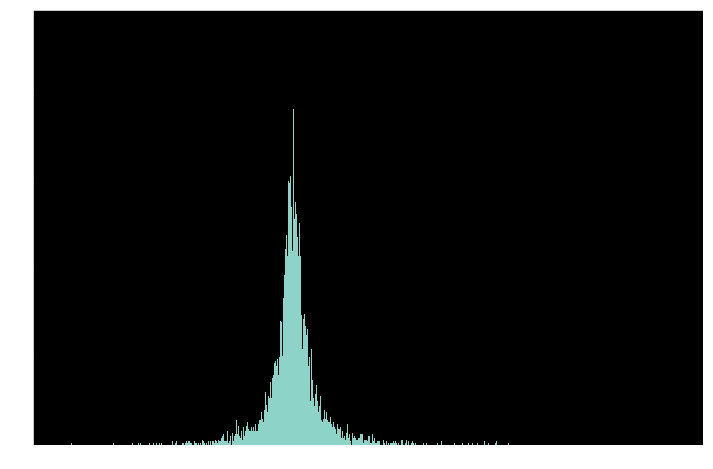

In [13]:
plt.figure(figsize=(12,8))
_ = plt.hist(pct_ch.adj_close, bins=1000)

In [14]:
test_df.pct_change(periods=2).head()

,adj_close,close,dividend,high,low,open,split,symbol,volume
1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-04,-0.003808,-0.003813,NaN,0.010798,-0.008391,0.008331,0.0,NaN,0.681453
1998-01-05,-0.003815,-0.003820,NaN,0.010740,-0.008427,0.008297,0.0,NaN,0.508272
1998-01-06,0.003822,0.003828,NaN,0.000602,0.006515,-0.007345,0.0,NaN,0.014962


In [15]:
test_df.pct_change(periods=2).shift(periods=-2).head()

,adj_close,close,dividend,high,low,open,split,symbol,volume
1998-01-02,-0.003808,-0.003813,NaN,0.010798,-0.008391,0.008331,0.0,NaN,0.681453
1998-01-03,-0.003815,-0.003820,NaN,0.010740,-0.008427,0.008297,0.0,NaN,0.508272
1998-01-04,0.003822,0.003828,NaN,0.000602,0.006515,-0.007345,0.0,NaN,0.014962
1998-01-05,-0.006291,-0.006289,NaN,-0.018259,-0.002894,-0.010438,0.0,NaN,-0.234951
1998-01-06,-0.004804,-0.004804,NaN,-0.006541,-0.013540,-0.008632,0.0,NaN,0.144245


In [16]:
# now nans are on the bottom
test_df.pct_change(periods=2).shift(periods=-2).tail()

,adj_close,close,dividend,high,low,open,split,symbol,volume
2019-04-20,0.001578,0.001578,NaN,0.001939,0.005200,0.001756,0.0,NaN,-0.282822
2019-04-21,0.014374,0.014374,NaN,0.013723,0.012900,0.012958,0.0,NaN,0.282435
2019-04-22,0.010100,0.010100,NaN,0.014919,0.015909,0.025852,0.0,NaN,0.910986
2019-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Normalize

In [17]:
mean_nm = pct_ch.divide(pct_ch.abs().mean(axis=1), axis=0)
mean_nm.head()

,adj_close,close,dividend,high,low,open,split,symbol,volume
1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-03,-0.037197,-0.037247,NaN,0.105484,-0.081969,0.081385,0.0,NaN,6.656718
1998-01-04,-0.049149,-0.049215,NaN,0.138365,-0.108556,0.106884,0.0,NaN,6.547831
1998-01-05,-0.060765,-0.060847,NaN,0.169830,-0.134525,0.131350,0.0,NaN,6.442683
1998-01-06,0.206763,0.207043,NaN,-0.169686,0.388437,-0.411341,0.0,NaN,-5.616730


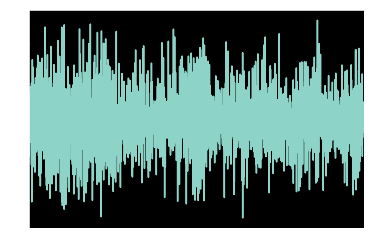

In [18]:
mean_nm.adj_close.plot()

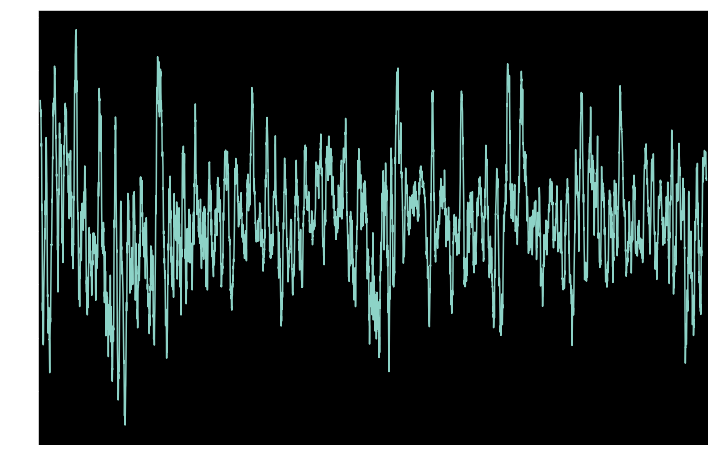

In [19]:
plt.figure(figsize=(12,8))
mean_nm.adj_close.rolling(window=40, win_type='gaussian', center=True).mean(std=20).plot()

In [20]:
pct_ch.divide(pct_ch.abs().max(axis=1), axis=0).head()

,adj_close,close,dividend,high,low,open,split,symbol,volume
1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-03,-0.005588,-0.005595,NaN,0.015846,-0.012314,0.012226,0.0,NaN,1.0
1998-01-04,-0.007506,-0.007516,NaN,0.021131,-0.016579,0.016324,0.0,NaN,1.0
1998-01-05,-0.009432,-0.009444,NaN,0.026360,-0.020880,0.020387,0.0,NaN,1.0
1998-01-06,0.036812,0.036862,NaN,-0.030211,0.069157,-0.073235,0.0,NaN,-1.0


In [21]:
test_df

,adj_close,close,dividend,high,low,open,split,symbol,volume
1998-01-02,10.679600,131.130000,0.0,131.500000,129.500000,129.630000,1.0,NaN,4.968500e+06
1998-01-03,10.659267,130.880000,0.0,132.210000,128.956667,130.170000,1.0,NaN,6.661400e+06
1998-01-04,10.638933,130.630000,0.0,132.920000,128.413333,130.710000,1.0,NaN,8.354300e+06
1998-01-05,10.618600,130.380000,0.0,133.630000,127.870000,131.250000,1.0,NaN,1.004720e+07
1998-01-06,10.679600,131.130000,0.0,133.000000,129.250000,129.750000,1.0,NaN,8.479300e+06
1998-01-07,10.551800,129.560000,0.0,131.190000,127.500000,129.880000,1.0,NaN,7.686600e+06
1998-01-08,10.628300,130.500000,0.0,132.130000,127.500000,128.630000,1.0,NaN,9.702400e+06
1998-01-09,10.343300,127.000000,0.0,131.500000,125.870000,130.060000,1.0,NaN,1.094180e+07
1998-01-10,10.411167,127.833333,0.0,131.000000,125.370000,128.246667,1.0,NaN,1.056093e+07
1998-01-11,10.479033,128.666667,0.0,130.500000,124.870000,126.433333,1.0,NaN,1.018007e+07


### Form some X*b = Y

In [22]:
from sklearn.linear_model import LinearRegression

In [35]:
D = left_windows(pct_ch.adj_close,30,offset=-1)

In [25]:
D['y'] = pct_ch.adj_close

In [26]:
D.dropna(inplace=True)

In [27]:
D.head()

,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,y
1998-02-02,-0.001904,-0.001908,-0.001911,0.005745,-0.011967,0.007250,-0.026815,0.006561,0.006519,0.006476,...,0.008440,0.008370,0.008300,0.024262,0.026242,-0.005027,0.006336,0.012713,0.012553,0.012398
1998-02-03,-0.001908,-0.001911,0.005745,-0.011967,0.007250,-0.026815,0.006561,0.006519,0.006476,0.020309,...,0.008370,0.008300,0.024262,0.026242,-0.005027,0.006336,0.012713,0.012553,0.012398,0.006461
1998-02-04,-0.001911,0.005745,-0.011967,0.007250,-0.026815,0.006561,0.006519,0.006476,0.020309,-0.007574,...,0.008300,0.024262,0.026242,-0.005027,0.006336,0.012713,0.012553,0.012398,0.006461,0.005963
1998-02-05,0.005745,-0.011967,0.007250,-0.026815,0.006561,0.006519,0.006476,0.020309,-0.007574,0.009008,...,0.024262,0.026242,-0.005027,0.006336,0.012713,0.012553,0.012398,0.006461,0.005963,-0.008738
1998-02-06,-0.011967,0.007250,-0.026815,0.006561,0.006519,0.006476,0.020309,-0.007574,0.009008,0.022216,...,0.026242,-0.005027,0.006336,0.012713,0.012553,0.012398,0.006461,0.005963,-0.008738,0.017307


In [28]:
y = D.pop('y').values

In [29]:
X = D.values

In [30]:
regr = LinearRegression().fit(X,y)

In [31]:
regr.coef_

array([-0.00416977,  0.00972186,  0.01032262, -0.0294787 , -0.01437988,
       -0.0161604 ,  0.00322742, -0.00024617, -0.0170621 ,  0.0112661 ,
       -0.00482599,  0.01949312,  0.00766535,  0.01513665,  0.01038451,
       -0.00159345,  0.01402481, -0.00687237, -0.00338272, -0.00799158,
        0.00667996,  0.00519191,  0.00480369,  0.00963709, -0.03001148,
       -0.01980272, -0.02239944, -0.00555646,  0.00898874,  0.0215403 ])

In [32]:
y_hat = regr.predict(X)

In [33]:
def figsize(*args):
    plt.figure(figsize=args)

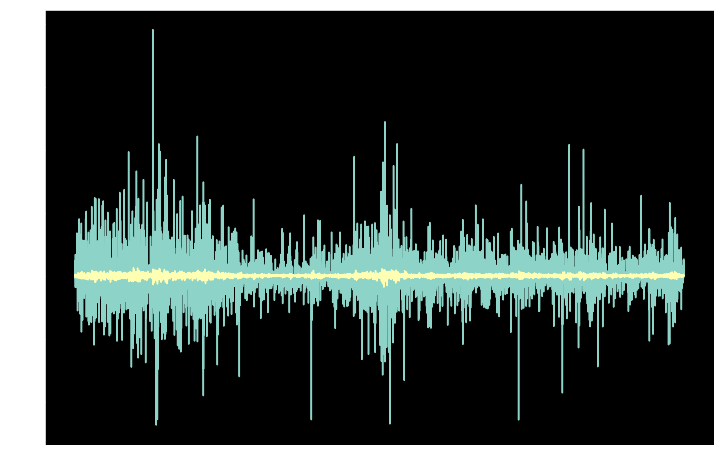

In [34]:
figsize(12,8)
plt.plot(y)
plt.plot(y_hat)